11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7392 - loss: 1.0344
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9146 - loss: 0.3006
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9319 - loss: 0.2395
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9429 - loss: 0.2004
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9498 - loss: 0.1770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9554 - loss: 0.1565
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9602 - loss: 0.1372
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9657 - loss: 0.1214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9682 - loss: 0.1129
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9701 - loss: 0.1046
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9718 - loss: 0.0989
Epoch 2/10
1875/1875 ━━━

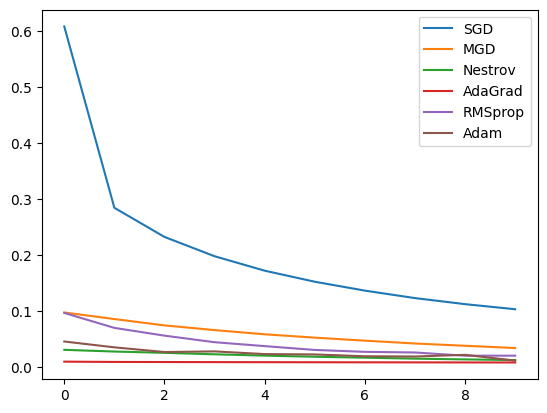

In [2]:
import tensorflow as tf #딥러닝
from tensorflow import keras #고수준 API, 신경망 모델을 쉽게 구축하고 훈련
import matplotlib.pyplot as plt #데이터 시각화



(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data() # MNIST 손글씨 숫자(0~9) 데이터셋을 로드 / 훈련데이터와 레이블 / 검증데이터와 레이블
train_x = train_x[..., tf.newaxis] #train_x 데이터의 마지막 차원에 새로운 차원을 추가
test_x = test_x[..., tf.newaxis] #...: 생략된 차원인데, 모든 차원을 유지한다는 의미. / #tf.newaxis: 새로운 차원을 추가.

#MNIST는 2차원 배열인데 딥러닝 모델 인풋은 3차원 이상 텐서를 입력으로 받음 -> 그래서 10, 28, 28 을 10, 28, 28, 1 로 바꿔줌

x_train = train_x / 255. #입력 데이터를 0과 1 사이의 값으로 정규화 / 학습 속도를 향상시키고 모델의 성능을 개선하는 데 도움이 됨
x_test = test_x / 255.


# model.fit: 모델을 학습시킴
# x_train, train_y: 학습 데이터와 레이블을 지정
# epochs: 전체 데이터셋을 몇 번 반복하여 학습할지를 지정.
# batch_size: 한 번에 학습할 데이터의 개수를 지정.


#model.add =  Keras의 Sequential 모델에 새로운 층(layer)을 추가하는 메서드
model = keras.Sequential() #tf.keras.Sequential: 순차적인 모델을 정의
model.add(keras.layers.Flatten(input_shape=(28, 28, 1))) #tf.keras.layers.Flatten: 2차원 이미지 데이터를 1차원 벡터로 펼침
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax')) #output 출력층으로, 10개의 클래스(0~9)에 대한 확률을 출력. softmax 활성화 함수를 사용하여 각 클래스에 대한 확률을 계산.

model.summary() #딥러닝 모델의 구조를 요약하여 출력 / 모델층별정보, 총파리미터수, 모델크기 등을 표로 출력해줌


sgd = keras.optimizers.SGD(learning_rate=0.01) # Stochastic GD / SGD옵티마이저 사용한다는 sgd를 선언
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy']) #위 sgd를 사용해서 model을 컴파일
hist_sgd = model.fit(x_train, train_y, epochs=10) #컴파일된 model를 fit으로 학습시켜 hist_sgd에 저장


mgd = keras.optimizers.SGD(momentum=0.5, learning_rate=0.01) #모멘트 추가
model.compile(optimizer=mgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_mgd = model.fit(x=x_train, y=train_y, epochs=10)


nes = keras.optimizers.SGD(momentum=0.5, nesterov=True, learning_rate=0.01) # Nestrov Accelerated GD    #모멘트추가 + nesterov=True: 이동 후 바로 미분
model.compile(optimizer=nes, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_nes = model.fit(x=x_train, y=train_y, epochs=10)



# Adagrad
adagrad = tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,    #누적값의 초기값 설정
    epsilon=1e-07)                    #0으로 나누는것을 방지하기 위한 작은 상수값
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_adagrad = model.fit(x=x_train, y=train_y, epochs=10)


# RMSprop
rmsprop = keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,     #감쇠율(0~1) 이전 계산된 기울기 제곱의 가중치를 조절하는 역할, 값크면 이전기울기제곱 / 값작으면 최근기울기제곱에 영향커짐
    epsilon=1e-07)
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_rmsprop = model.fit(x=x_train, y=train_y, epochs=10)


# Adam
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9, #모멘텀, 값 크면 현 업데이트방향 영향력 커져서 학습이 안정적으로 진행, 값작으면 최근 업데이트방향 영향력 커져서 학습 빨라지지만 불안해질 수 있음.
    beta_2=0.999, # RMSpop 감쇠율임, 이전 기울기 제곱의 가중치를 조절, 큰값일수록 이전기울기 제곱 영향력상승, 작은값일수록 최근기울기 제곱 영향력상승
    epsilon=1e-07)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_adam = model.fit(x=x_train, y=train_y, epochs=10)

# model.compile: 모델을 컴파일
# optimizer: 사용할 옵티마이저를 지정
# loss: 손실 함수를 지정. 여기서는 sparse_categorical_crossentropy를 사용하여 다중 클래스 분류 문제를 해결.
# metrics: 평가 지표를 지정. 여기서는 정확도(accuracy)를 사용.
#epochs=오른쪽 데이터를 학습하는 횟수를 의미함 (전체 6만개를 32개로 나눴을때 6만개 전부를 학습하는게 1 epochs임), batch_size=학습하는 데이터 개수
#2번째 epochs부터 32개의 데이터 순서는 랜덤으로 배치하여 진행됨


plt.plot(hist_sgd.epoch, hist_sgd.history["loss"], label="SGD") #hist_sgd.epoch: 각 에포크 번호 나타냄
plt.plot(hist_mgd.epoch, hist_mgd.history["loss"], label="MGD") #hist_sgd.history["loss"]: 각 에포크에서 계산된 손실 함수 값을 나타냄
plt.plot(hist_nes.epoch, hist_nes.history["loss"], label="Nestrov")
plt.plot(hist_adagrad.epoch, hist_adagrad.history["loss"], label="AdaGrad")
plt.plot(hist_rmsprop.epoch, hist_rmsprop.history["loss"], label="RMSprop")
plt.plot(hist_adam.epoch, hist_adam.history["loss"], label="Adam")
plt.legend()
plt.show()




Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7024 - loss: 0.8959
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8839 - loss: 0.3776
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9028 - loss: 0.3228
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9103 - loss: 0.2899
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9168 - loss: 0.2707
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9198 - loss: 0.2611
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9254 - loss: 0.2494
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9273 - loss: 0.2403
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9265 - loss: 0.2425
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9314 - loss: 0.2308


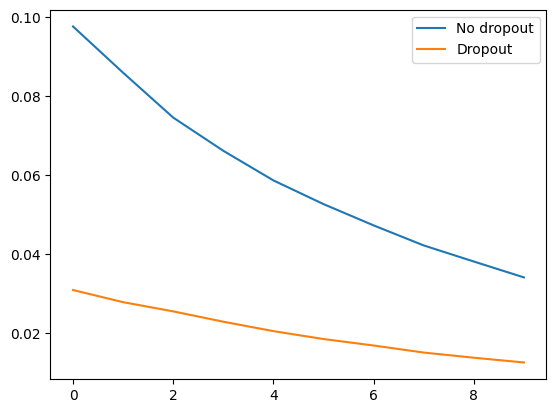

In [4]:
# Dropout layer 추가

model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model_dropout.add(keras.layers.Dropout(rate=0.5))
model_dropout.add(keras.layers.Dense(units=256, activation='relu'))
model_dropout.add(keras.layers.Dropout(rate=0.5))
model_dropout.add(keras.layers.Dense(units=256, activation='relu'))
model_dropout.add(keras.layers.Dropout(rate=0.5))
model_dropout.add(keras.layers.Dense(units=10, activation='softmax'))

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

model_dropout.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_dropout = model_dropout.fit(x=x_train, y=train_y, epochs=10)

plt.plot(hist_adam.epoch, hist_mgd.history["loss"], label="No dropout")
plt.plot(hist_dropout.epoch, hist_nes.history["loss"], label="Dropout")
plt.legend()
plt.show()